# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [3]:
# Set units to metric for temperatures
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lepsy
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | pacifica
Processing Record 6 of Set 1 | velyka pysarivka
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | ixtapa
Processing Record 11 of Set 1 | hovd
Processing Record 12 of Set 1 | patnanungan
Processing Record 13 of Set 1 | ghadamis
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | howard springs
Processing Record 19 of Set 1 | caleta de carquin
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | sao tome
Processing Record 22 of Set 1 | papatowai
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = {
    "City": city,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
}
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lepsy,46.2350,78.9456,0.74,37,0,9.60,KZ,1732427063
1,port mathurin,-19.6833,63.4167,24.69,75,8,8.46,MU,1732427064
2,waitangi,-43.9535,-176.5597,11.01,76,20,3.58,NZ,1732427066
3,port-aux-francais,-49.3500,70.2167,4.06,73,64,17.90,TF,1732427067
4,pacifica,37.6138,-122.4869,11.47,91,20,3.09,US,1732427068


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lepsy,46.2350,78.9456,0.74,37,0,9.60,KZ,1732427063
1,port mathurin,-19.6833,63.4167,24.69,75,8,8.46,MU,1732427064
2,waitangi,-43.9535,-176.5597,11.01,76,20,3.58,NZ,1732427066
3,port-aux-francais,-49.3500,70.2167,4.06,73,64,17.90,TF,1732427067
4,pacifica,37.6138,-122.4869,11.47,91,20,3.09,US,1732427068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

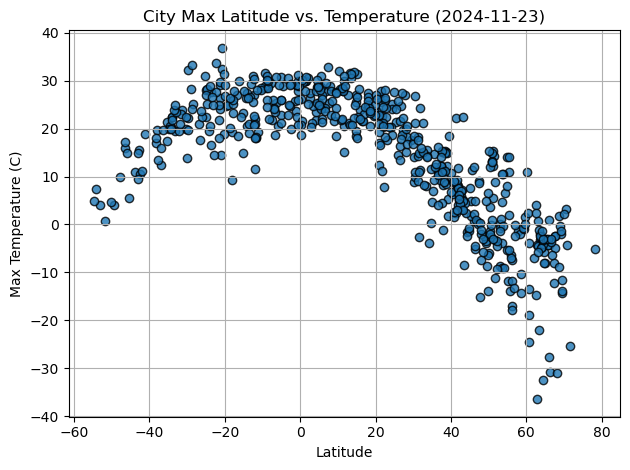

In [9]:
# import datetime to format date field
from datetime import datetime

# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
current_date = datetime.now().strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

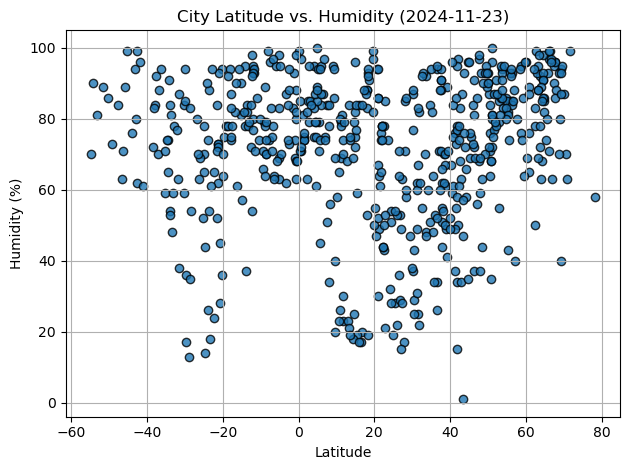

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

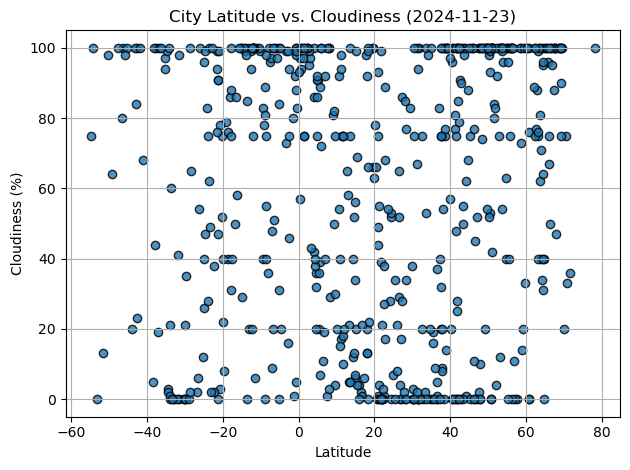

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

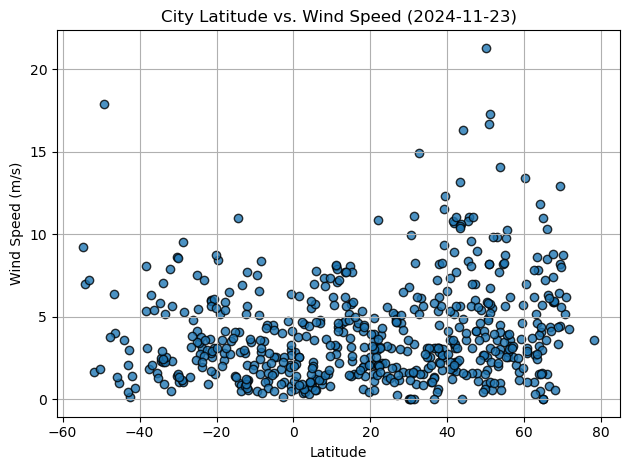

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_regression_line(x_values, y_values, xlabel, ylabel, title):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot scatter plot
    plt.scatter(x_values,y_values)
    
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    
    # Plot elements
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Print r-squared value
    print(f"The r^2-value is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lepsy,46.2350,78.9456,0.74,37,0,9.60,KZ,1732427063
4,pacifica,37.6138,-122.4869,11.47,91,20,3.09,US,1732427068
5,velyka pysarivka,50.4259,35.4850,-1.28,76,100,5.87,UA,1732427069
8,qaqortoq,60.7167,-46.0333,-13.39,65,0,3.11,GL,1732427073
9,ixtapa,20.7000,-105.2000,23.57,94,0,1.54,MX,1732427074


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,24.69,75,8,8.46,MU,1732427064
2,waitangi,-43.9535,-176.5597,11.01,76,20,3.58,NZ,1732427066
3,port-aux-francais,-49.3500,70.2167,4.06,73,64,17.90,TF,1732427067
6,adamstown,-25.0660,-130.1015,22.47,70,26,7.52,PN,1732427070
7,hermanus,-34.4187,19.2345,20.45,74,3,2.29,ZA,1732427071


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7580031446496477


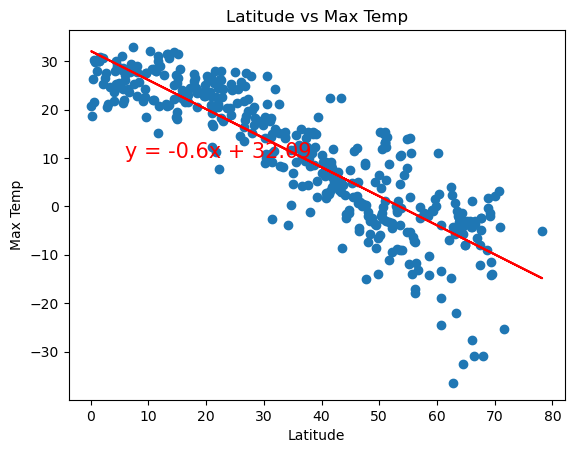

In [16]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

xlabel = 'Latitude'
ylabel = 'Max Temp'
title = 'Latitude vs Max Temp'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.4046772429015796


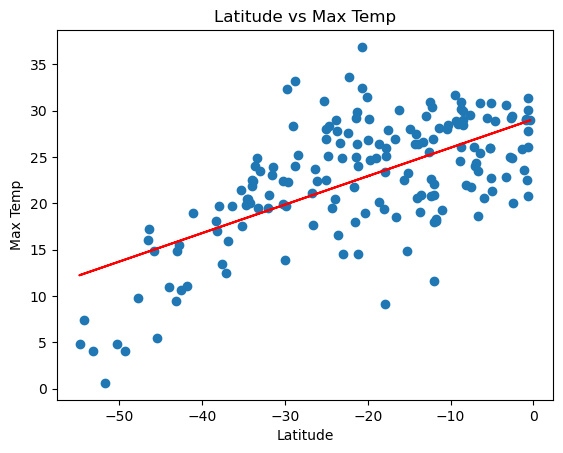

In [17]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

xlabel = 'Latitude'
ylabel = 'Max Temp'
title = 'Latitude vs Max Temp'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.05353273840137745


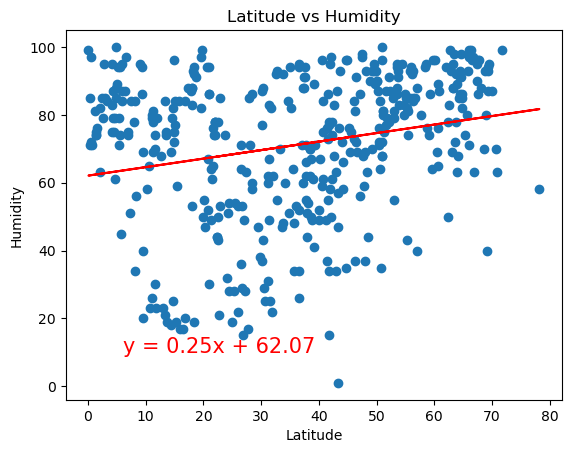

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Latitude vs Humidity'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.01081554935095502


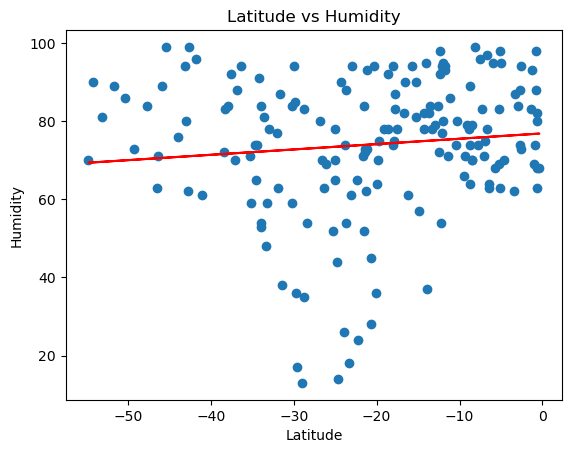

In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Latitude vs Humidity'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.04643228822662153


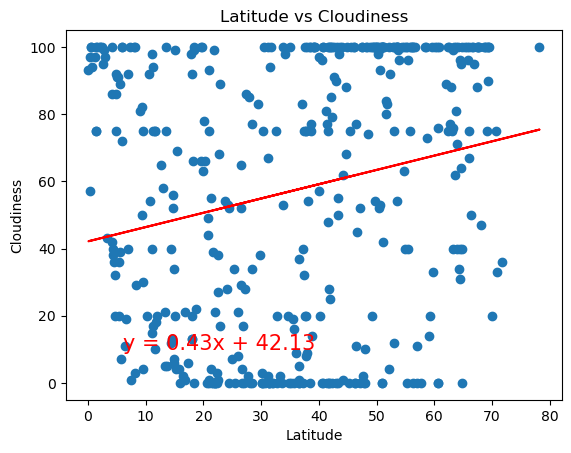

In [21]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Latitude vs Cloudiness'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.026851889815278206


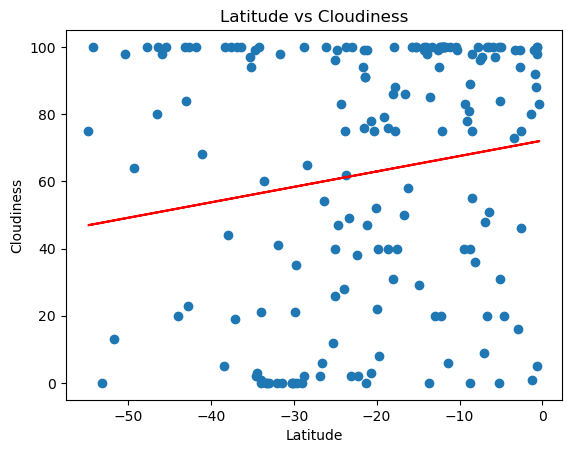

In [22]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Latitude vs Cloudiness'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.04959404905865689


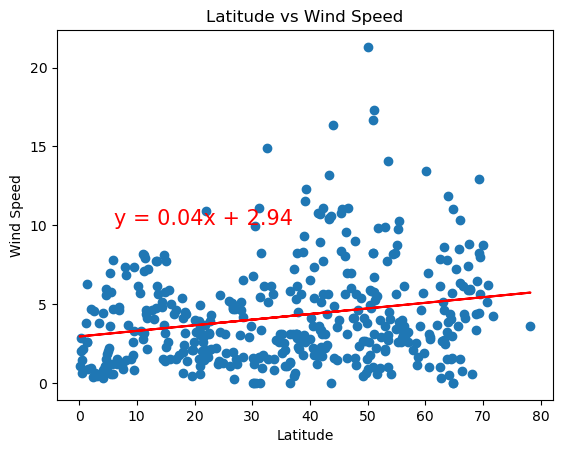

In [23]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Latitude vs Wind Speed'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.04379327599938621


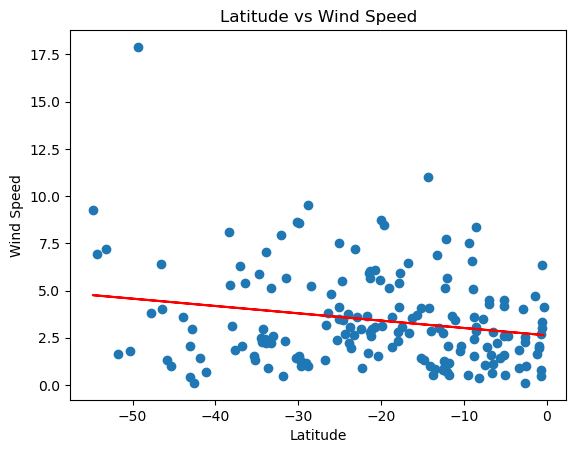

In [24]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Latitude vs Wind Speed'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE